In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from copy import deepcopy
import random
from tqdm import tqdm
from heuristic import *

# Import des fichiers existants
from nodes import Node
from algo_Astar import a_star, manhattan_distance, get_possible_swaps

In [5]:
def generate_random_grid(size=3):
    """Génère une grille aléatoire de taille donnée"""
    numbers = list(range(1, size*size)) + [""]
    random.shuffle(numbers)
    return [numbers[i*size:(i+1)*size] for i in range(size)]

def is_solvable(grid):
    """Vérifie si une configuration est solvable"""
    # Convertir la grille en liste plate
    flat_grid = [num for row in grid for num in row if num != '']
    
    # Compter les inversions
    inversions = 0
    for i in range(len(flat_grid)):
        for j in range(i+1, len(flat_grid)):
            if flat_grid[i] > flat_grid[j]:
                inversions += 1
                
    # Pour une grille 3x3, le puzzle est solvable si le nombre d'inversions est pair
    return inversions % 2 == 0

In [6]:
def run_experiment(n_tests=50):
    """Exécute les expériences avec différentes configurations"""
    k_values = [0, 2, 3, 4]
    heuristics = {
        'manhattan': manhattan_distance,
        'hamming': hamming_distance,
        'euclidean': euclidean_distance,
        'linear_conflict': linear_conflict
    }
    
    results = []
    
    for _ in tqdm(range(n_tests)):
        # Générer une grille solvable
        while True:
            grid = generate_random_grid(3)
            if is_solvable(grid):
                break
        
        for k in k_values:
            for heur_name, heur_func in heuristics.items():
                start_time = time.time()
                solution = a_star(grid, k)
                solve_time = time.time() - start_time
                
                results.append({
                    'k': k,
                    'heuristic': heur_name,
                    'time': solve_time,
                    'moves': len(solution) - 1 if solution else None,
                    'solved': solution is not None
                })
    
    return pd.DataFrame(results)

In [7]:
# Exécuter les expériences
results_df = run_experiment(50)
results_df.to_csv('puzzle_experiments.csv', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:27<00:00,  1.79it/s]


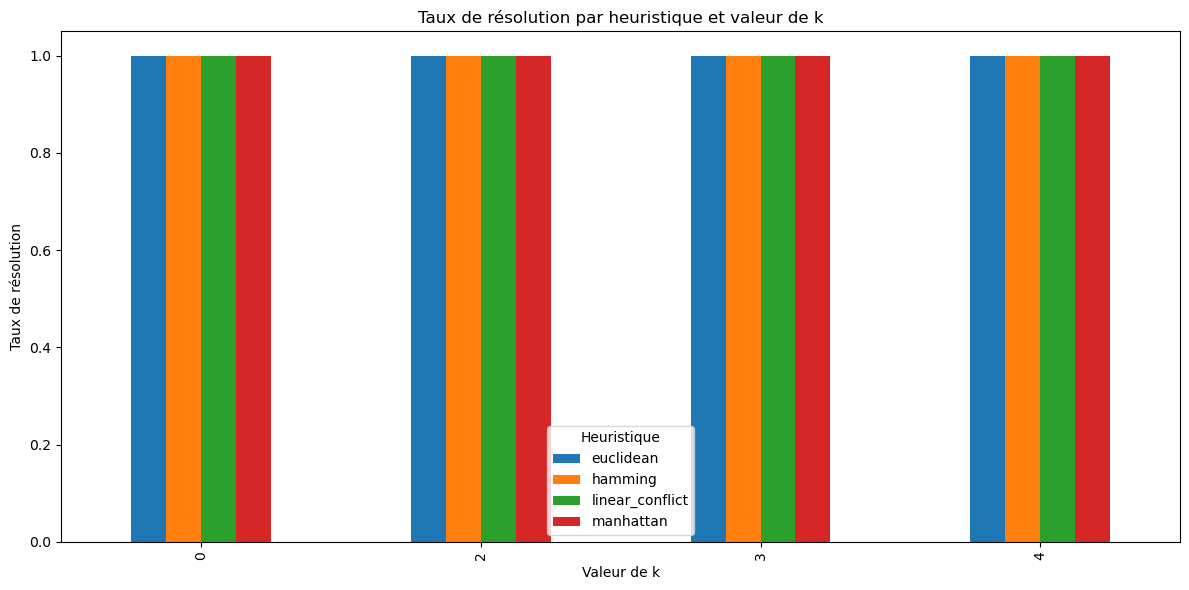

<Figure size 1200x600 with 0 Axes>

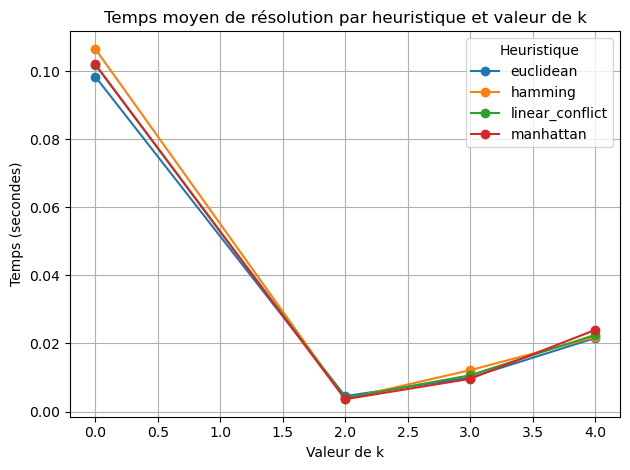

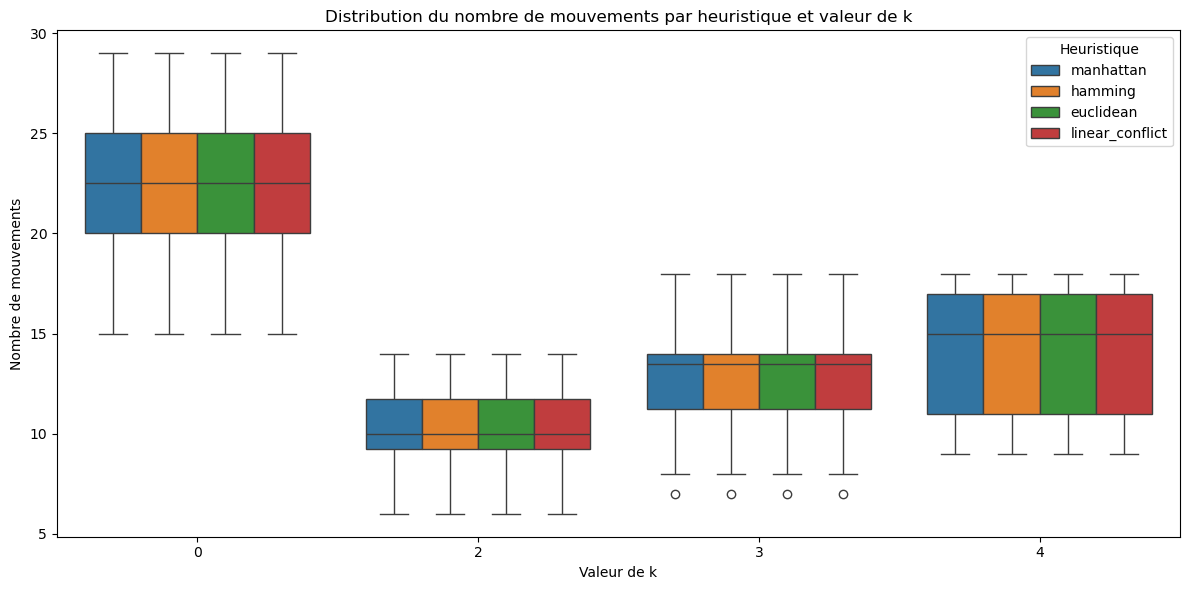

Statistiques par heuristique :


time                     moves                solved
                  mean    std  min    max   mean    std min max   mean
heuristic                                                             
euclidean        0.034  0.076  0.0  0.640  15.05  5.369   6  29    1.0
hamming          0.036  0.080  0.0  0.673  15.05  5.369   6  29    1.0
linear_conflict  0.035  0.081  0.0  0.735  15.05  5.369   6  29    1.0
manhattan        0.035  0.083  0.0  0.798  15.05  5.369   6  29    1.0


Statistiques par valeur de k :


time                     moves                solved
    mean    std  min    max   mean    std min max   mean
k                                                       
0  0.102  0.134  0.0  0.798  22.78  3.241  15  29    1.0
2  0.004  0.005  0.0  0.018  10.54  1.739   6  14    1.0
3  0.011  0.016  0.0  0.106  12.82  2.336   7  18    1.0
4  0.022  0.035  0.0  0.185  14.06  3.135   9  18    1.0

In [9]:
# Taux de résolution par heuristique et valeur de k
plt.figure(figsize=(12, 6))
success_rates = results_df.groupby(['k', 'heuristic'])['solved'].mean().unstack()
success_rates.plot(kind='bar', ax=plt.gca())
plt.title('Taux de résolution par heuristique et valeur de k')
plt.xlabel('Valeur de k')
plt.ylabel('Taux de résolution')
plt.legend(title='Heuristique')
plt.tight_layout()
plt.show()

# Temps moyen de résolution
plt.figure(figsize=(12, 6))
solve_times = results_df[results_df['solved']].groupby(['k', 'heuristic'])['time'].mean().unstack()
solve_times.plot(kind='line', marker='o')
plt.title('Temps moyen de résolution par heuristique et valeur de k')
plt.xlabel('Valeur de k')
plt.ylabel('Temps (secondes)')
plt.legend(title='Heuristique')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution du nombre de mouvements
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df[results_df['solved']], x='k', y='moves', hue='heuristic')
plt.title('Distribution du nombre de mouvements par heuristique et valeur de k')
plt.xlabel('Valeur de k')
plt.ylabel('Nombre de mouvements')
plt.legend(title='Heuristique')
plt.tight_layout()
plt.show()

# Analyse statistique détaillée
print("Statistiques par heuristique :")
stats = results_df[results_df['solved']].groupby('heuristic').agg({
    'time': ['mean', 'std', 'min', 'max'],
    'moves': ['mean', 'std', 'min', 'max'],
    'solved': 'mean'
}).round(3)
display(stats)

print("\nStatistiques par valeur de k :")
stats_k = results_df[results_df['solved']].groupby('k').agg({
    'time': ['mean', 'std', 'min', 'max'],
    'moves': ['mean', 'std', 'min', 'max'],
    'solved': 'mean'
}).round(3)
display(stats_k)